## Project 01: How  American Homicide Changed Over This Decade
 by Hafsa and Nicole

# How do murder rates in 2020 differ from 2010?
### *Did per capita homicide rates rise this decade? Is there a correlation between population size and murder rates? Below we will explore state crime statistics from the Federal Bureau of Investigation to answer these questions.*

In [1]:
# Dependencies and modules:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint
import seaborn as sns
sns.set_theme(style="whitegrid")
import statistics
import math
from scipy import stats

# Import API key
from api_keys import FBI_api

In [2]:
# Here we define a dictionary of state abbreviations that we can use to pull data for
# individual states from the FBI Crime Data Explorer API.

states = {'AK': 'Alaska','AL': 'Alabama','AR': 'Arkansas','AS': 'American Samoa',
          'AZ': 'Arizona','CA': 'California', 'CO': 'Colorado','CT': 'Connecticut',
          'DC': 'District of Columbia','DE': 'Delaware','FL': 'Florida','GA': 'Georgia',
          'GU': 'Guam','HI': 'Hawaii','IA': 'Iowa','ID': 'Idaho','IL': 'Illinois','IN': 
          'Indiana','KS': 'Kansas','KY': 'Kentucky','LA': 'Louisiana','MA': 'Massachusetts',
          'MD': 'Maryland','ME': 'Maine','MI': 'Michigan','MN': 'Minnesota','MO': 'Missouri',
          'MP': 'Northern Mariana Islands','MS': 'Mississippi','MT': 'Montana','NA': 
          'National','NC': 'North Carolina','ND': 'North Dakota','NE': 'Nebraska','NH': 
          'New Hampshire','NJ': 'New Jersey','NM': 'New Mexico','NV': 'Nevada','NY': 'New York',
          'OH': 'Ohio','OK': 'Oklahoma','OR': 'Oregon','PA': 'Pennsylvania','PR': 'Puerto Rico',
          'RI': 'Rhode Island','SC': 'South Carolina','SD': 'South Dakota','TN': 'Tennessee',
          'TX': 'Texas','UT': 'Utah','VA': 'Virginia','VI': 'Virgin Islands','VT': 'Vermont',
          'WA': 'Washington','WI': 'Wisconsin','WV': 'West Virginia','WY': 'Wyoming'}

In [3]:
# Here we have compiled the parts needed to build a URL for API calls:

# Base URL: api.usa.gov/crime/fbi/sapi/
# Endpoint: /api/estimates/states/               
# Our api: FBI_api    

# We will now create a sample json output that we can use to identify formatting and nesting
# of each piece of data that we want to add to our dataframe

state_abbr = 'MO'   
base_url = "https://api.usa.gov/crime/fbi/sapi/api/estimates/states/"

req = requests.get(base_url + f'{state_abbr}/2010/2010?API_KEY={FBI_api}')
print(req)  # response 200!

json_data = req.json()
print(json_data)

<Response [200]>
{'results': [{'state_id': 28, 'state_abbr': 'MO', 'year': 2010, 'population': 5995715, 'violent_crime': 27440, 'homicide': 420, 'rape_legacy': 1445, 'rape_revised': None, 'robbery': 6185, 'aggravated_assault': 19390, 'property_crime': 200858, 'burglary': 44197, 'larceny': 140526, 'motor_vehicle_theft': 16135, 'arson': 1542}], 'pagination': {'count': 1, 'page': 0, 'pages': 1, 'per_page': 0}}


#### Now we will gather the desired data for our dataframes into two python dictionaries: one for 2010 and another for 2020. The data we want: state abbreviation, population, and number of homicides for 2010 and 2020. 

#### We will get that by making an empty set for each key value and appending it with a try/except call from the api.

In [15]:
# First, we will create a dictionary for 2010 and add data to our dictionary:

murder_by_state_2010= {'State': [], 
                       'Year': [], 
                       'Population': [], 
                       'Number of Homicides': []}

for state_abbr in states:
    base_url = "https://api.usa.gov/crime/fbi/sapi/api/estimates/states/"   =
    
    try:
        
        req = requests.get(base_url + f'{state_abbr}/2010/2010?API_KEY={FBI_api}')
        
        data = req.json()
        #print(data['results'][0])
        
        murder_by_state_2010['State'].append(data['results'][0]['state_abbr'])
        murder_by_state_2010['Year'].append(data['results'][0]['year'])
        murder_by_state_2010['Population'].append(data['results'][0]['population'])
        murder_by_state_2010['Number of Homicides'].append(data['results'][0]['homicide'])
        
     
    except:
                       
        pass

In [16]:
# Here we repeat the call for 2020:

murder_by_state_2020 = {'State': [], 
                        'Year': [],
                        'Population': [],
                        'Number of Homicides': []}

for state_abbr in states:
    base_url = "https://api.usa.gov/crime/fbi/sapi/api/estimates/states/"   
    
    try:
        
        req = requests.get(base_url + f'{state_abbr}/2020/2020?API_KEY={FBI_api}')
        
        data = req.json()
                
        murder_by_state_2020['State'].append(data['results'][0]['state_abbr'])
        murder_by_state_2020['Year'].append(data['results'][0]['year'])
        murder_by_state_2020['Population'].append(data['results'][0]['population'])
        murder_by_state_2020['Number of Homicides'].append(data['results'][0]['homicide'])
         
                
    except:
                           
        pass

In [6]:
# Here we examine our dictionary to ensure it contains the data we are looking for.

murder_by_state_2010

{'State': ['AK',
  'AL',
  'AR',
  'AZ',
  'CA',
  'CO',
  'CT',
  'DC',
  'DE',
  'FL',
  'GA',
  'HI',
  'IA',
  'ID',
  'IL',
  'IN',
  'KS',
  'KY',
  'LA',
  'MA',
  'MD',
  'ME',
  'MI',
  'MN',
  'MO',
  'MS',
  'MT',
  'NC',
  'ND',
  'NE',
  'NH',
  'NJ',
  'NM',
  'NV',
  'NY',
  'OH',
  'OK',
  'OR',
  'PA',
  'RI',
  'SC',
  'SD',
  'TN',
  'TX',
  'UT',
  'VA',
  'VT',
  'WA',
  'WI',
  'WV',
  'WY'],
 'Year': [2010,
  2010,
  2010,
  2010,
  2010,
  2010,
  2010,
  2010,
  2010,
  2010,
  2010,
  2010,
  2010,
  2010,
  2010,
  2010,
  2010,
  2010,
  2010,
  2010,
  2010,
  2010,
  2010,
  2010,
  2010,
  2010,
  2010,
  2010,
  2010,
  2010,
  2010,
  2010,
  2010,
  2010,
  2010,
  2010,
  2010,
  2010,
  2010,
  2010,
  2010,
  2010,
  2010,
  2010,
  2010,
  2010,
  2010,
  2010,
  2010,
  2010,
  2010],
 'Population': [714146,
  4785401,
  2921588,
  6413158,
  37338198,
  5047692,
  3575498,
  604912,
  899792,
  18838613,
  9712157,
  1363359,
  3050202,
  1571102

In [7]:
# Repeat for the 2020 dictionary.
murder_by_state_2020

{'State': ['AK',
  'AL',
  'AR',
  'AZ',
  'CA',
  'CO',
  'CT',
  'DC',
  'DE',
  'FL',
  'GA',
  'HI',
  'IA',
  'ID',
  'IL',
  'IN',
  'KS',
  'KY',
  'LA',
  'MA',
  'MD',
  'ME',
  'MI',
  'MN',
  'MO',
  'MS',
  'MT',
  'NC',
  'ND',
  'NE',
  'NH',
  'NJ',
  'NM',
  'NV',
  'NY',
  'OH',
  'OK',
  'OR',
  'PA',
  'RI',
  'SC',
  'SD',
  'TN',
  'TX',
  'UT',
  'VA',
  'VT',
  'WA',
  'WI',
  'WV',
  'WY'],
 'Year': [2020,
  2020,
  2020,
  2020,
  2020,
  2020,
  2020,
  2020,
  2020,
  2020,
  2020,
  2020,
  2020,
  2020,
  2020,
  2020,
  2020,
  2020,
  2020,
  2020,
  2020,
  2020,
  2020,
  2020,
  2020,
  2020,
  2020,
  2020,
  2020,
  2020,
  2020,
  2020,
  2020,
  2020,
  2020,
  2020,
  2020,
  2020,
  2020,
  2020,
  2020,
  2020,
  2020,
  2020,
  2020,
  2020,
  2020,
  2020,
  2020,
  2020,
  2020],
 'Population': [731158,
  4921532,
  3030522,
  7421401,
  39368078,
  5807719,
  3557006,
  712816,
  986809,
  21733312,
  10710017,
  1407006,
  3163561,
  182691

In [8]:
# Now we can create a dataframe in order to efficiently work with our collected data. We will start by making two
# distinct dataframes in order to be able to easily manipulate data per year, then we will join the dataframes in
# order to manipulate all relevant data at once.

# 2010 dataframe:
state_murders_2010 = pd.DataFrame(murder_by_state_2010)
# This worked as expected.

#Now we want to add a column for per capita murder rates. Per capita murder rate is equal to 
# the number of homicides divided by the population.The dataframe would also look better if
# the Year was made the index.

state_murders_2010['Homicides Per Capita'] = state_murders_2010['Number of Homicides'] / state_murders_2010['Population']
state_homicide_2010 = state_murders_2010.set_index('Year')

# Repeat for 2020
state_murders_2020 = pd.DataFrame(murder_by_state_2020)

state_murders_2020['Homicides Per Capita'] = state_murders_2020['Number of Homicides'] / state_murders_2020['Population']
state_homicide_2020 = state_murders_2020.set_index('Year')

# Join the dataframes

state_murders_df = pd.concat([state_murders_2010, state_murders_2020],ignore_index=True)
state_homicide_combined = state_murders_df.sort_values(by='State',axis=0, ascending=True, inplace=False, kind='quicksort',)

# There now exist three distinct dataframes to work from: state_homicide_2010, state_homicide_2020, 
# and state_homicide_combined.


In [9]:
#Here we will display the 2010 dataframe for reference:
state_homicide_2010

,State,Population,Number of Homicides,Homicides Per Capita
Year,,,,
2010,AK,714146,31,0.000043
2010,AL,4785401,275,0.000057
2010,AR,2921588,134,0.000046
2010,AZ,6413158,408,0.000064
2010,CA,37338198,1809,0.000048
2010,CO,5047692,129,0.000026
2010,CT,3575498,133,0.000037
2010,DC,604912,132,0.000218
2010,DE,899792,51,0.000057


In [10]:
# Display of 2020 dataframe for reference:
state_homicide_2020

,State,Population,Number of Homicides,Homicides Per Capita
Year,,,,
2020,AK,731158,49,0.000067
2020,AL,4921532,471,0.000096
2020,AR,3030522,321,0.000106
2020,AZ,7421401,513,0.000069
2020,CA,39368078,2203,0.000056
2020,CO,5807719,294,0.000051
2020,CT,3557006,140,0.000039
2020,DC,712816,201,0.000282
2020,DE,986809,73,0.000074


In [11]:
# Display of combined dataframe for reference:
state_homicide_combined

,State,Year,Population,Number of Homicides,Homicides Per Capita
0,AK,2010,714146,31,0.000043
51,AK,2020,731158,49,0.000067
1,AL,2010,4785401,275,0.000057
52,AL,2020,4921532,471,0.000096
2,AR,2010,2921588,134,0.000046
...,...,...,...,...,...
48,WI,2010,5691659,155,0.000027
100,WV,2020,1784787,117,0.000066
49,WV,2010,1854368,58,0.000031
50,WY,2010,564554,8,0.000014


## Now that we have collected and organized the data we want, we can analyze and visualize it.

## National Homicide Per Capita

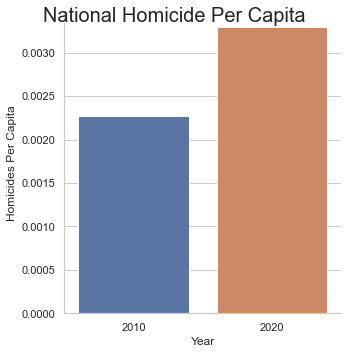

In [12]:
#Here we will sum the values from each year of all states' per capita homicide rates 
# into one national value and then visualize that value with a bold bar chart.

National_Per_Capita_Rate_2010 = state_homicide_2010['Homicides Per Capita'].sum()
National_Per_Capita_Rate_2020 = state_homicide_2020['Homicides Per Capita'].sum()

#Creating a dictionary to assign key years to values to make a dataframe with years data included. 
rate_by_year = {'2010':National_Per_Capita_Rate_2010,'2020':National_Per_Capita_Rate_2020,}
 
National_per_capita = pd.DataFrame(list(rate_by_year.items()), columns = ['Year','Homicides Per Capita'])

sns.set_theme(style="whitegrid")
cp = sns.catplot(x = 'Year', y='Homicides Per Capita', data=National_per_capita, kind='bar')
cp.fig.suptitle('National Homicide Per Capita',fontsize =20)
sns.set(rc = {'figure.figsize':(8,15)})
plt.savefig('National Homicide Per Capita.png')
plt.show()



# State Homicide Per Capita by Year
## Did homicide rates in 2020 increase from 2010 rates (adjusted for population growth)?
Here we can see per capita rates for each state as compared between years.


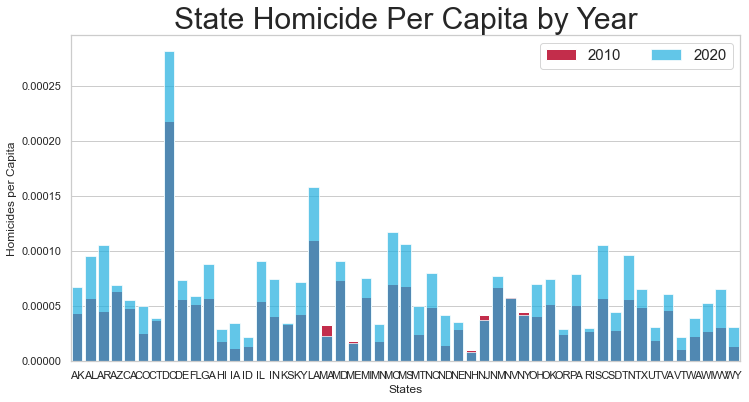

In [17]:
# Visualizing data with Seaporn relational bar chart as homicides per capita per state, overlaid by year.
ax = plt.subplots()

ax = sns.barplot(x=state_homicide_2010['State'],
                 y=state_homicide_2010['Homicides Per Capita'],
                 color='crimson', label = '2010')
ax = sns.barplot(x=state_homicide_2020['State'],
                 y=state_homicide_2020['Homicides Per Capita'],
                 color='deepskyblue',
                 alpha  = 0.7, label = '2020')
ax.set(xlabel="States", ylabel="Homicides per Capita")
ax.set_title('State Homicide Per Capita by Year',fontsize = 30)
ax.legend(ncol = 2, loc = 'upper right',fontsize = 15)
sns.set(rc = {'figure.figsize':(12,6)})
plt.savefig('State Homicide Per Capita by Year.png')
plt.show()

# Homicides per Capita per Population Size

## Do murders occur more often when more people live together?
With this data, we want to explore the correlation between per capita murder rates and population size.


[[1.         0.04932725]
 [0.04932725 1.        ]]


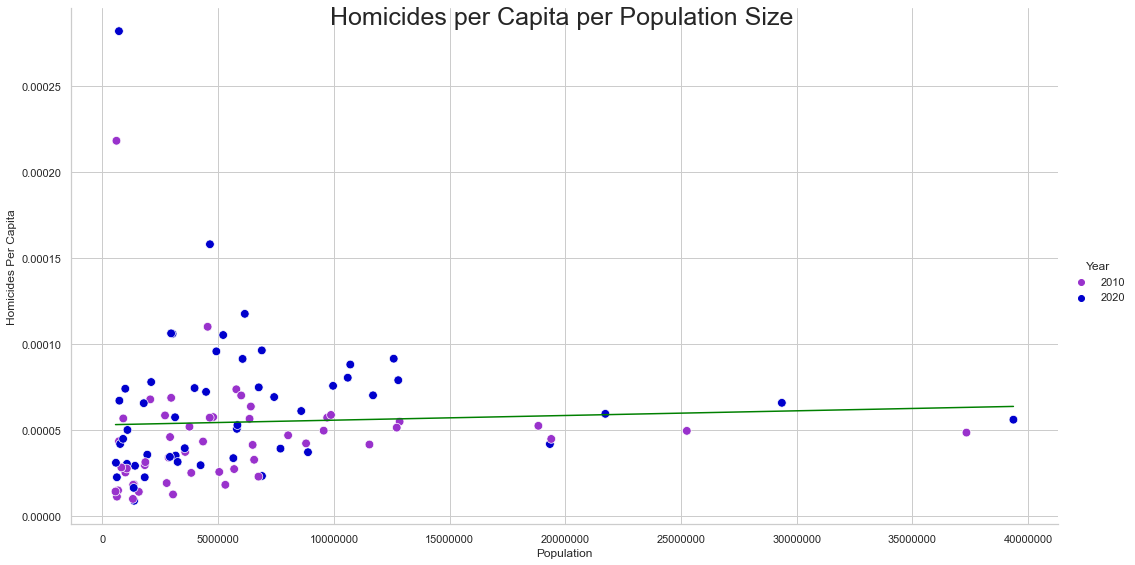

In [14]:
## We wondered at the correlation between population and murder rates. Of course there will be more murders where
# there are more people, so to have a more meaningful analysis, we should account for population by using the per 
# capita value for homicides while comparing rates to population size.
# To visualize this, we will create a scatter plot applying states' values of per capita homicide against their 
# population size. Then we can use np stats to analyze the correlation coefficient and plot a line-of-best-fit to not
# only quantitate the correlation coefficient, but to make it easy to see and understand in a graphical representation.

sns.set_theme(style="whitegrid") 

hue_colors= {2010:'darkorchid',
             2020: 'mediumblue'}
x=state_homicide_combined['Population']
y= state_homicide_combined['Homicides Per Capita']  # <-- here I am defining values to calculate corrcoef from

p = sns.relplot(x='Population',
                 y= 'Homicides Per Capita',
                 data =state_homicide_combined,
                 kind = 'scatter',
                 hue = 'Year',
                 palette = hue_colors,
                 height=8,
                 aspect=15/8,
                 s=75)
plt.ticklabel_format(style='plain')
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), color='green') # <-- Here is code for my trendline
p.fig.suptitle('Homicides per Capita per Population Size',  fontsize= 25)
print(np.corrcoef(x, y))    # <-- here is a small bit of code that will print the correlation coefficent of the data I've
# already plotted.
plt.savefig('Homicides per Capita per Population Size.png')
plt.show()

# Conclusions

Here we can answer our questions and support or refute our hypotheses.

## The data clearly supports the hypothesis that, even when adjusted to account for population growth, more homicides were committed in 2020 than in 2010. 
## This is true for both national rates, as can be seen in the figure "National Homicide Per Capita", and on the state level, as shown in figure "State Homicide Per Capita by Year".
## Furthermore, states with higher populations did not show a correlation with higher homicides per capita, as depicted in figure "Homicides per Capita per Population Size".

##### Thank you, from Hafsa and Nicole!